## Ames - Housing Project

In [1]:
#imports:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#setting max rows/columns
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,...,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,...,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,...,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,...,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,...,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,...,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train.shape

(2051, 81)

### Checking Null Values in Dataset

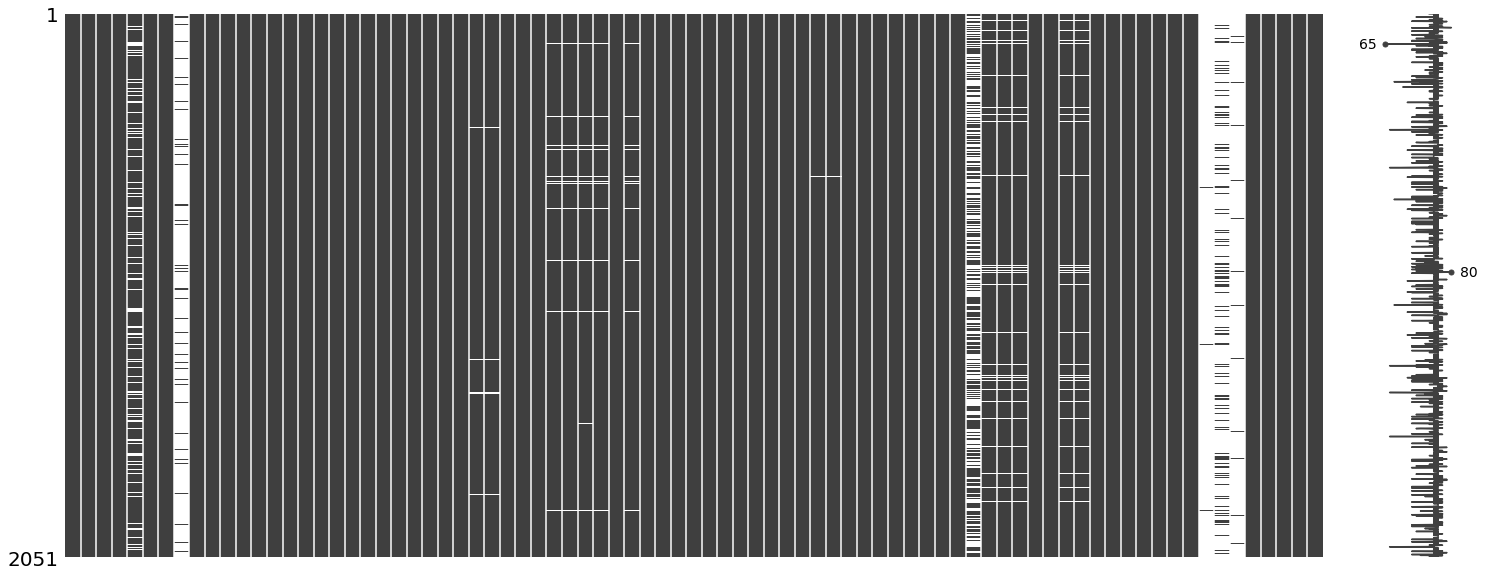

In [6]:
msno.matrix(train);

In [7]:
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

Pool QC, Fence, and Misc Features represent the columns that have the most missing values.\
I will impute the mean or mode based on the column type.\
Added the number "0" for any columns with values less than 10

In [8]:
train['Lot Frontage'] = train['Lot Frontage'].fillna(train['Lot Frontage'].mean())

#dropping columns due to many missing values
#train.drop(columns = ['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature'], inplace = True)

train['Bsmt Qual'] = train['Bsmt Qual'].fillna(train['Bsmt Qual'].mode()[0])
train['Bsmt Cond'] = train['Bsmt Cond'].fillna(train['Bsmt Cond'].mode()[0])

train['Garage Type'] = train['Garage Type'].fillna(train['Garage Type'].mode()[0])
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(train['Garage Yr Blt'].mode()[0])

train['Garage Finish'] = train['Garage Finish'].fillna(train['Garage Finish'].mode()[0])
train['Garage Qual'] = train['Garage Qual'].fillna(train['Garage Qual'].mode()[0])
train['Garage Cond'] = train['Garage Cond'].fillna(train['Garage Cond'].mode()[0])

train['Mas Vnr Type'] = train['Mas Vnr Type'].fillna(train['Mas Vnr Type'].mode()[0])
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(train['Mas Vnr Area'].mode()[0])

train = train.replace(np.nan, 0)

In [9]:
train.isnull().sum().sum()

0

#### Renaming the values below to something more discernible

In [10]:
train["Bldg Type"] = train["Bldg Type"].replace(to_replace="2fmCon", value="2FmCon")
train["Bldg Type"] = train["Bldg Type"].replace(to_replace="Duplex", value="Duplx")
train["Bldg Type"] = train["Bldg Type"].replace(to_replace="Twnhs", value="TwnhsI")
train["Exterior 2nd"] = train["Exterior 2nd"].replace(to_replace="Brk Cmn", value="BrkComm")
train["Exterior 2nd"] = train["Exterior 2nd"].replace(to_replace="CmentBd", value="CemntBd")
train["Exterior 2nd"] = train["Exterior 2nd"].replace(to_replace="Wd Shng", value="WdShing")
train["MS Zoning"] = train["MS Zoning"].replace(to_replace="A (agr)", value="A")
train["MS Zoning"] = train["MS Zoning"].replace(to_replace="C (all)", value="C")
train["MS Zoning"] = train["MS Zoning"].replace(to_replace="I (all)", value="I")
train["Neighborhood"] = train["Neighborhood"].replace(to_replace="NAmes", value="Names")
train["Sale Type"] = train["Sale Type"].replace(to_replace="WD ", value="WD")

In [11]:
#Getting basic statistics of the numerical columns
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1980.169186,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,21.306357,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.447222,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,69.055200,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1985.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2004.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [12]:
#setting variable that encapsulates all numerical columns
numerical_columns = train[['Lot Area', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'SalePrice']]

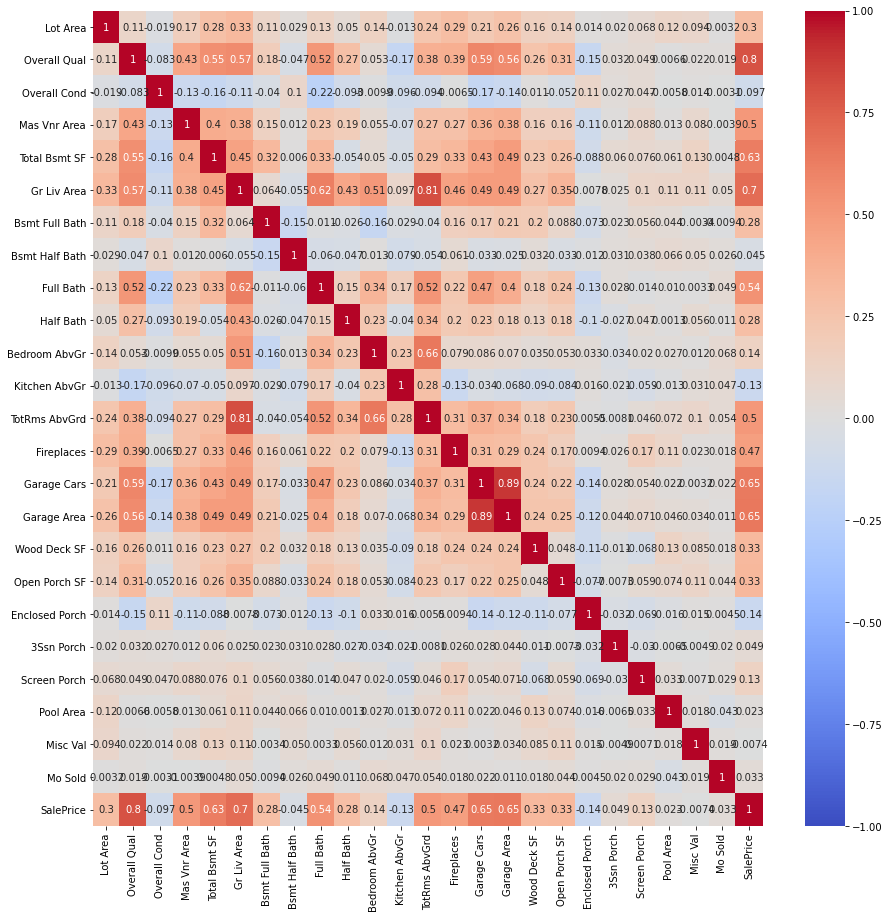

In [13]:
#correlation matrix to find intercorrelation
plt.figure(figsize = (15,15));
sns.heatmap(numerical_columns.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm');

Making a safe assumption that any correlation score over 60% is deemed a high correlation between the features (Overall Qual, Gr Liv Area, Garage Cars, Garage Area, Total Bsmt SF), and the target (SalePrice)

#### Creating Dummy Variables for Bsmt Qual, Exter Qual, Kitchen Qual

In [14]:
bsmt_quality_dummies = pd.get_dummies(train['Bsmt Qual'], prefix = 'Bsmt Qual')

exter_quality_dummies = pd.get_dummies(train['Exter Qual'], prefix = 'Exter Qual')

kitchen_quality_dummies = pd.get_dummies(train['Kitchen Qual'], prefix = 'Kitchen Qual')

house_style_dummies = pd.get_dummies(train['House Style'], prefix = 'House Style')

garage_finish_dummies = pd.get_dummies(train['Garage Finish'], prefix = 'Garage Finish')

train = pd.concat([train, bsmt_quality_dummies, exter_quality_dummies, kitchen_quality_dummies, house_style_dummies, garage_finish_dummies], axis = 1)

#### Correlation Matrix

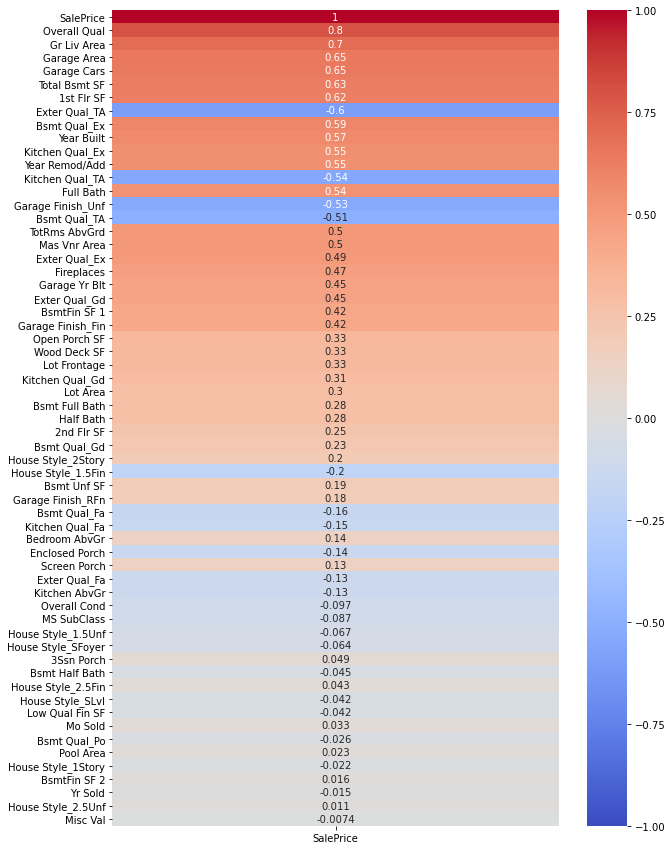

In [15]:
corr_train = train.drop(columns = ['PID', 'Id'])
#dropping these columns due to their values being objects

correlation = corr_train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False, key = np.abs);
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(data= correlation,
            cmap= 'coolwarm',      
            annot= True,
           vmax= 1,
           vmin= -1, 
           ax = ax);

We see a strong negative correlation of kitchen quality if it's deemed typical/Average

______

### Exploratory Data Visualizations

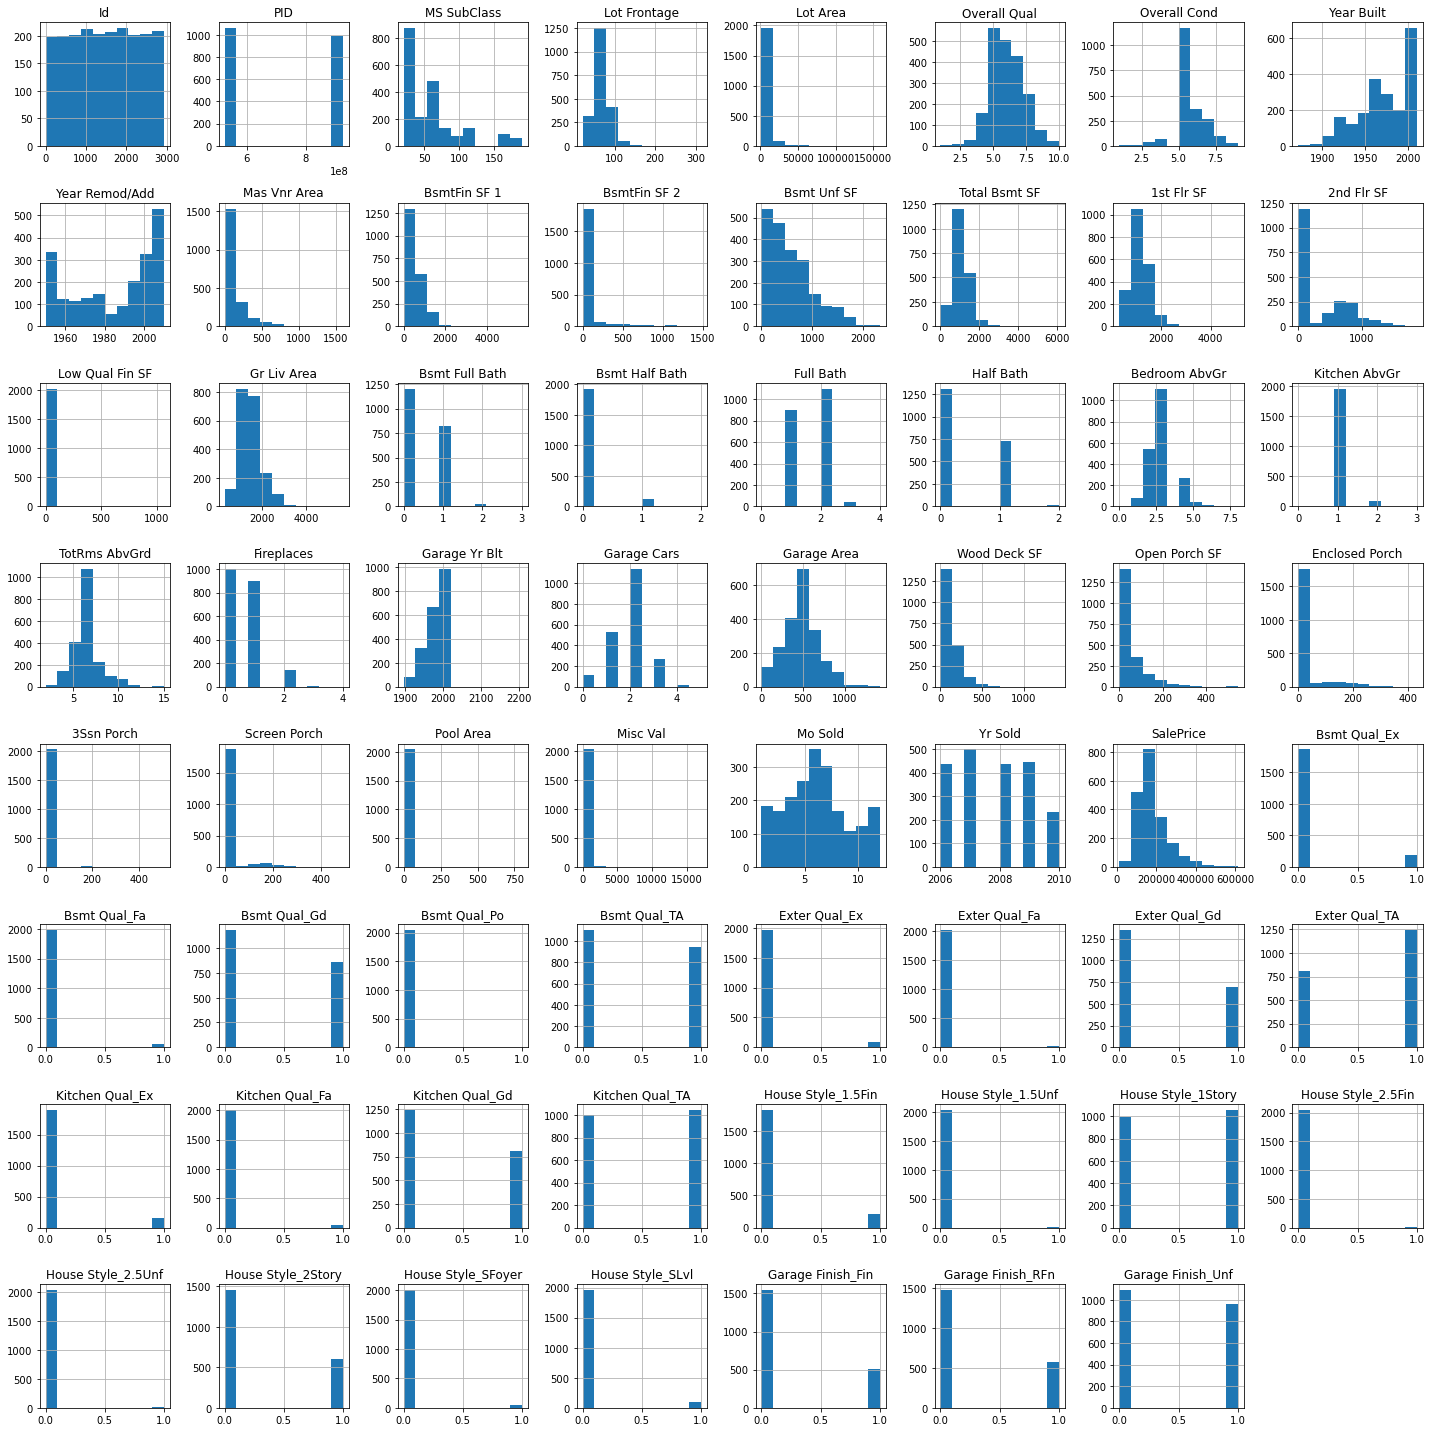

In [40]:
train.hist(figsize= (20,20))
plt.tight_layout();

In [41]:
# credits to Marta
# Function to visualize subplots
def viz_sub(data, target, features_list, graph):
    """viz_sub takes arguments dataframe, target, features_list, graph type (boxplot or scatterplot)"""
    grid_y = int(np.ceil(len(features_list)/2)) 
    
    fig, grid_x = plt.subplots(nrows=grid_y, ncols=2, figsize=(15,5*grid_y)) 
    
    grid_x = grid_x.flatten() 
    
    if len(features_list) %2 !=0:
        
        grid_x[len(features_list)].set_visible(False)
        
    for i, feat in enumerate(features_list):
        if graph == 'boxplot': #boxplot
            order = train.groupby(feat).mean()[target].sort_values().index #order elements in features
                                                                        #per relationship with target
            sns.boxplot(data[feat], data[target], order = order, ax = grid_x[i])
            grid_x[i].set_xticklabels(order,rotation=30)
            
        if graph == 'scatterplot': #scatterplot
            sns.scatterplot(data[feat], data[target], ax = grid_x[i])

        grid_x[i].set_title(f' " {target}" vs "{feat}"', fontsize =15)
        #grid_x[i].set_xticklabels(order,rotation=30)
        grid_x[i].set_ylabel('Price',fontsize=10)
        grid_x[i].set_xlabel(feat,fontsize=10) 

    plt.tight_layout();

In [42]:
#Creating a list of remaining numerig features to plot scatterplots
num_col = train.select_dtypes(include = 'int').columns.tolist() + train.select_dtypes(include = 'float').columns.tolist()

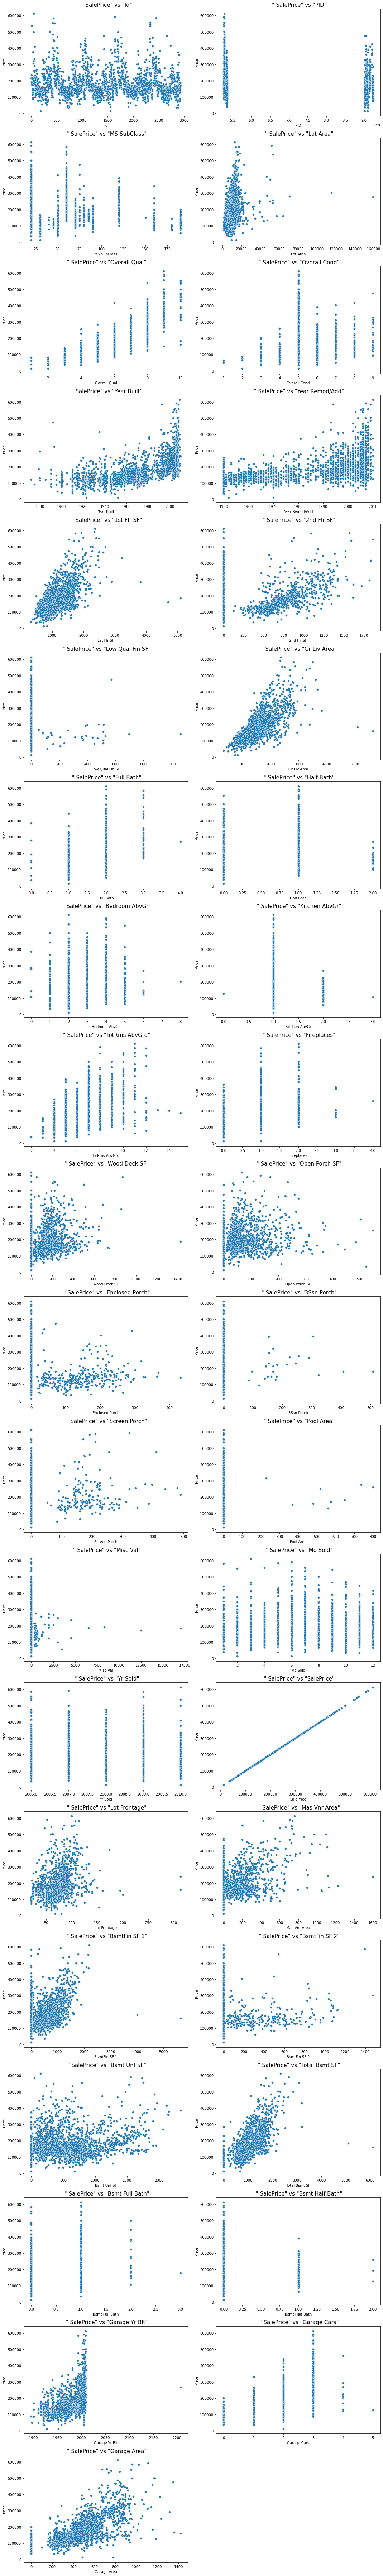

In [45]:
viz_sub(train, 'SalePrice', num_col, 'scatterplot')

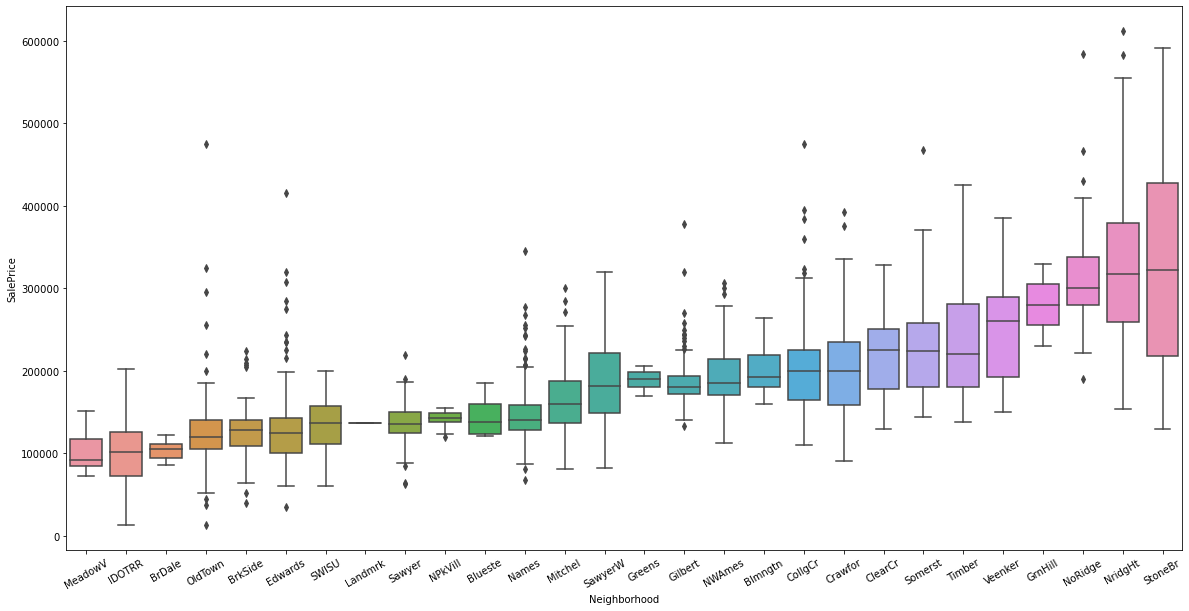

In [48]:
plt.figure(figsize= (20, 10))
order = train.groupby('Neighborhood').mean()['SalePrice'].sort_values().index 
sns.boxplot(train["Neighborhood"], train["SalePrice"], order = order);
#set_xticklabels(order,rotation=30)
plt.xticks(rotation = 30);

We see Neighborhoolds Stonebridge, Northridge Heights, and Northridge having a higher average median price in Ames, IA

## Model Prep: Train/test split

In [16]:
#setting Variables

X = train[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
           'Exter Qual_TA', 'Bsmt Qual_Ex', 'Year Built', 'Kitchen Qual_Ex', 'Year Remod/Add', 
           'Kitchen Qual_TA', 'Full Bath', 'Garage Finish_Unf', 'Bsmt Qual_TA', 'TotRms AbvGrd', 
           'Mas Vnr Area', 'Exter Qual_Ex', 'Fireplaces', 'Garage Yr Blt', 'Exter Qual_Gd']]

y = train['SalePrice']


In [17]:
variance = LinearRegression()

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(include_bias = False)

X_poly = poly.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [21]:
variance.fit(X_train, y_train)

LinearRegression()

In [22]:
variance.score(X_train, y_train), variance.score(X_test, y_test)

(0.8263646079843138, 0.8822200615540486)

In [23]:
cross_val_score(variance, X, y, cv = 5)

array([0.84969964, 0.89214931, 0.76340712, 0.85868319, 0.79412905])

In [24]:
cross_val_score(variance, X, y, cv = 5).mean()

0.8316136608424312

In [25]:
variance.score(X_train, y_train), variance.score(X_test, y_test)

(0.8263646079843138, 0.8822200615540486)

In [26]:
variance.coef_

array([ 1.15159734e+04,  3.44938233e+01,  1.36241616e+01,  8.24913275e+03,
        1.19610378e+01,  4.65828614e+00,  9.21677416e+03,  3.12907820e+04,
        1.87360217e+02,  3.05713988e+04,  2.41340033e+02, -6.06941223e+03,
       -9.15747971e+02, -3.78642654e+03, -6.92226178e+02,  1.13155061e+03,
        2.04893358e+01,  4.98361036e+04,  1.11423356e+04,  6.46242435e+00,
        1.80777658e+04])

In [27]:
#to match the coef with the features
list(zip(X.columns, variance.coef_))

[('Overall Qual', 11515.973434973841),
 ('Gr Liv Area', 34.49382329628605),
 ('Garage Area', 13.62416158432789),
 ('Garage Cars', 8249.13274983488),
 ('Total Bsmt SF', 11.961037785079924),
 ('1st Flr SF', 4.658286143475156),
 ('Exter Qual_TA', 9216.774160962215),
 ('Bsmt Qual_Ex', 31290.78199072454),
 ('Year Built', 187.3602170819154),
 ('Kitchen Qual_Ex', 30571.398774249155),
 ('Year Remod/Add', 241.3400331967285),
 ('Kitchen Qual_TA', -6069.4122297750855),
 ('Full Bath', -915.7479712623176),
 ('Garage Finish_Unf', -3786.426535881794),
 ('Bsmt Qual_TA', -692.2261777361831),
 ('TotRms AbvGrd', 1131.5506142998497),
 ('Mas Vnr Area', 20.48933575558716),
 ('Exter Qual_Ex', 49836.10355064589),
 ('Fireplaces', 11142.335587216834),
 ('Garage Yr Blt', 6.462424353615001),
 ('Exter Qual_Gd', 18077.765801450227)]

In [28]:
features = sorted(list(zip(variance.coef_, X.columns)), reverse = True)
features

[(49836.10355064589, 'Exter Qual_Ex'),
 (31290.78199072454, 'Bsmt Qual_Ex'),
 (30571.398774249155, 'Kitchen Qual_Ex'),
 (18077.765801450227, 'Exter Qual_Gd'),
 (11515.973434973841, 'Overall Qual'),
 (11142.335587216834, 'Fireplaces'),
 (9216.774160962215, 'Exter Qual_TA'),
 (8249.13274983488, 'Garage Cars'),
 (1131.5506142998497, 'TotRms AbvGrd'),
 (241.3400331967285, 'Year Remod/Add'),
 (187.3602170819154, 'Year Built'),
 (34.49382329628605, 'Gr Liv Area'),
 (20.48933575558716, 'Mas Vnr Area'),
 (13.62416158432789, 'Garage Area'),
 (11.961037785079924, 'Total Bsmt SF'),
 (6.462424353615001, 'Garage Yr Blt'),
 (4.658286143475156, '1st Flr SF'),
 (-692.2261777361831, 'Bsmt Qual_TA'),
 (-915.7479712623176, 'Full Bath'),
 (-3786.426535881794, 'Garage Finish_Unf'),
 (-6069.4122297750855, 'Kitchen Qual_TA')]

From this list of features, we can see that if the Exterior Quality, Basement, and Kitchen are deemed "Excellent", it greatly increases the value of the property.

Holding all else constant, for every 1 unit increase, the effect of the overall quality of a home contributes to approximately $11,516 in the housing value.

In [31]:
test = pd.read_csv('test_clean20.csv')

In [32]:
test.shape

(878, 106)

In [33]:
train.shape

(2051, 105)

In [34]:
y_preds = variance.predict(X)
y_preds

array([181485.80266954, 232283.1992231 , 126802.10605578, ...,
       167015.4606283 , 128869.20822023, 208893.00829069])

In [35]:
metrics.r2_score(y, y_preds)

#Interpretation: the model explains about 84.00% of the variation in the data

0.840040121463306

In [36]:
metrics.mean_squared_error(y, y_preds)

1004367637.3127614

In [37]:
metrics.mean_squared_error(y, y_preds)**0.5

31691.759769895412

In [38]:
metrics.r2_score(y, y_preds)

0.840040121463306

In [39]:
variance.score(X_train, y_train), variance.score(X_test, y_test)

(0.8263646079843138, 0.8822200615540486)

## Kaggle Submission

In [ ]:
#X_kaggle = test[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
#           'Exter Qual_TA', 'Bsmt Qual_Ex', 'Year Built', 'Kitchen Qual_Ex', 'Year Remod/Add', 
#           'Kitchen Qual_TA', 'Full Bath', 'Garage Finish_Unf', 'Bsmt Qual_TA', 'TotRms AbvGrd', 
#           'Mas Vnr Area', 'Exter Qual_Ex', 'Fireplaces', 'Garage Yr Blt', 'Exter Qual_Gd']]
#
#kaggle_predictions = variance.predict(X_kaggle)

In [ ]:
#kaggle_submission20 = pd.DataFrame()
#
#kaggle_submission20['Id'] = test['Id']
#kaggle_submission20['SalePrice'] = kaggle_predictions

In [ ]:
#kaggle_submission20.head()

In [ ]:
#kaggle_submission20.shape, test.shape

In [ ]:
#bmission20.to_csv('./.csv', index = False)